# 测试Keras环境

In [244]:
import keras
keras.__version__

'2.3.1'

# 数据准备

## 提取数据

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [246]:
data_train=pd.read_csv("../和鲸练习赛-员工满意度预测/data/训练集.csv")
data_test=pd.read_csv("../和鲸练习赛-员工满意度预测/data/测试集.csv")

In [247]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11999 non-null  int64  
 1   last_evaluation        11999 non-null  float64
 2   number_project         11999 non-null  int64  
 3   average_monthly_hours  11999 non-null  float64
 4   time_spend_company     11999 non-null  int64  
 5   Work_accident          11999 non-null  int64  
 6   package                11999 non-null  object 
 7   promotion_last_5years  11999 non-null  int64  
 8   division               11999 non-null  object 
 9   salary                 11999 non-null  object 
 10  satisfaction_level     11999 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


In [248]:
data_train.head(5)

,id,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,package,promotion_last_5years,division,salary,satisfaction_level
0,13697,0.99,3,161.39,2,0,a,0,accounting,medium,0.681
1,1142,1.00,5,226.22,6,0,b,0,marketing,low,0.876
2,7954,0.91,5,199.45,2,0,e,0,sales,medium,0.955
3,2225,0.51,3,235.14,3,0,c,0,sales,low,0.817
4,9753,0.89,3,219.91,2,0,a,0,technical,low,0.920


## 类别变量转化为数字变量

In [249]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_train["package"]=le.fit_transform(data_train["package"])
data_test["package"]=le.fit_transform(data_test["package"])
data_train["division"]=le.fit_transform(data_train["division"])
data_test["division"]=le.fit_transform(data_test["division"])
data_train["salary"]=le.fit_transform(data_train["salary"])
data_test["salary"]=le.fit_transform(data_test["salary"])

## 检测异常值

In [250]:
data_train.isnull().any()

id                       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
Work_accident            False
package                  False
promotion_last_5years    False
division                 False
salary                   False
satisfaction_level       False
dtype: bool

## 获取X和y

In [251]:
data_train

,id,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,package,promotion_last_5years,division,salary,satisfaction_level
0,13697,0.99,3,161.39,2,0,0,0,2,2,0.681
1,1142,1.00,5,226.22,6,0,1,0,5,1,0.876
2,7954,0.91,5,199.45,2,0,4,0,7,2,0.955
3,2225,0.51,3,235.14,3,0,2,0,7,1,0.817
4,9753,0.89,3,219.91,2,0,0,0,9,1,0.920
...,...,...,...,...,...,...,...,...,...,...,...
11994,11971,0.89,4,150.45,3,0,4,0,2,0,0.849
11995,14966,0.81,5,221.28,5,0,1,0,7,1,0.836
11996,7491,0.60,4,136.36,4,1,2,0,7,2,0.915
11997,12680,0.84,6,268.54,4,0,1,0,0,1,0.099


In [252]:
X=data_train.iloc[:,1:-1]
y=data_train.iloc[:,-1]
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)

In [253]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=90)

# 建模

In [254]:
X_train.shape

(9599, 9)

In [255]:
from keras import layers,models
from keras import optimizers
from keras import regularizers
model=models.Sequential()
model.add(layers.Dense(64,input_dim=9,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(1))
adam=optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,loss='mse',metrics=["mse"])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_83 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_84 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_85 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 17        
Total params: 7,425
Trainable params: 7,425
Non-trainable params: 0
_________________________________________________________________


In [256]:
history=model.fit(X_train,y_train,batch_size=16,epochs=15,validation_data=(X_test,y_test))

Train on 9599 samples, validate on 2400 samples
Epoch 1/15
9599/9599 [==============================] - 5s 528us/step - loss: 0.3371 - mse: 0.0704 - val_loss: 0.1265 - val_mse: 0.0550
Epoch 2/15
9599/9599 [==============================] - 3s 264us/step - loss: 0.0989 - mse: 0.0558 - val_loss: 0.0780 - val_mse: 0.0501
Epoch 3/15
9599/9599 [==============================] - 2s 255us/step - loss: 0.0734 - mse: 0.0502 - val_loss: 0.0674 - val_mse: 0.0476
Epoch 4/15
9599/9599 [==============================] - 2s 249us/step - loss: 0.0666 - mse: 0.0481 - val_loss: 0.0638 - val_mse: 0.0463
Epoch 5/15
9599/9599 [==============================] - 2s 254us/step - loss: 0.0625 - mse: 0.0456 - val_loss: 0.0602 - val_mse: 0.0437
Epoch 6/15
9599/9599 [==============================] - 2s 247us/step - loss: 0.0605 - mse: 0.0441 - val_loss: 0.0584 - val_mse: 0.0424
Epoch 7/15
9599/9599 [==============================] - 2s 245us/step - loss: 0.0586 - mse: 0.0429 - val_loss: 0.0587 - val_mse: 0.0434


In [257]:
history_dict = history.history
print(history_dict)

{'val_loss': [0.1264624751607577, 0.07797301938136418, 0.06740736318131288, 0.06383883307377497, 0.06021558235088984, 0.058377655595541, 0.05867117464542389, 0.05723249800503254, 0.05545117701093356, 0.05440584344168504, 0.054334748337666196, 0.055064636642734206, 0.053881412607928114, 0.05404561780393124, 0.053245460937420525], 'val_mse': [0.05499528348445892, 0.05005408823490143, 0.04764091968536377, 0.046332892030477524, 0.043655429035425186, 0.04244013503193855, 0.04343133792281151, 0.04259464517235756, 0.041373882442712784, 0.041049111634492874, 0.041122887283563614, 0.04208008572459221, 0.04114268720149994, 0.04144306853413582, 0.04077767953276634], 'loss': [0.3370619801891162, 0.09890389601949454, 0.07343232003130358, 0.06658340028115257, 0.06250228617483532, 0.060496056123485985, 0.058561768642420915, 0.057146238470676104, 0.0563979293083428, 0.05562989496634595, 0.0545748705410165, 0.054398789655303495, 0.05410726162738782, 0.054195466094205676, 0.05377697353112051], 'mse': [0

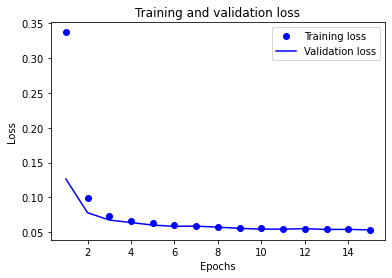

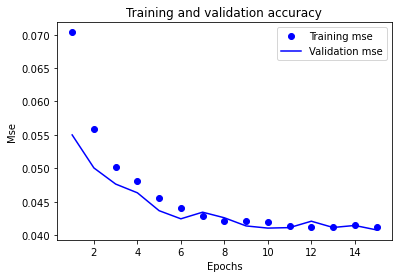

In [258]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mse = history_dict['mse']
epochs = range(1, len(mse) + 1)
 
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()# 
mse_values = history_dict['mse']
val_mse_values = history_dict['val_mse']
 
plt.plot(epochs, mse_values, 'bo', label = 'Training mse')
plt.plot(epochs, val_mse_values, 'b', label = 'Validation mse')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Mse')
plt.legend()
plt.show()

# 预测和文件输出

## 测试数据提取

In [259]:
data_test

,id,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,package,promotion_last_5years,division,salary
0,4615,0.78,4,260.71,2,0,4,0,9,2
1,1680,0.96,7,275.38,5,0,1,0,5,1
2,8866,0.57,4,207.29,5,0,4,0,7,1
3,7525,0.89,5,150.70,4,0,2,0,9,2
4,5389,0.93,3,141.23,2,0,4,0,8,2
...,...,...,...,...,...,...,...,...,...,...
2995,8434,0.45,3,132.90,2,0,2,0,9,1
2996,14013,0.73,4,245.77,2,0,0,0,7,1
2997,10221,0.75,4,242.90,4,0,0,0,6,1
2998,12847,0.70,3,235.52,4,0,2,0,2,0


In [260]:
test_file=data_test.iloc[:,1:]
test_file=mm.fit_transform(test_file)

In [261]:
result=model.predict(test_file)
result=pd.DataFrame(result)
output_file=pd.merge(data_test.iloc[:,0],result,left_index=True,right_index=True)
output_file.rename(columns={0:"satisfaction_level"},inplace=True)
output_file.set_index("id",drop=True,inplace=True)
output_file

,satisfaction_level
id,
4615,0.749274
1680,0.131939
8866,0.644643
7525,0.721678
5389,0.665100
...,...
8434,0.557682
14013,0.729527
10221,0.715078


In [262]:
output_file.to_csv("11.csv",encoding='utf-8-sig')